In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = (r"C:\Users\HP\Downloads\Train")
test_dir = (r"C:\Users\HP\Downloads\Test")

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=20,zoom_range=0.2)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_gen = train_datagen.flow_from_directory(
    train_dir,target_size=(256,256),batch_size=32,class_mode="categorical"
)

Found 1322 images belonging to 1 classes.


In [6]:
test_gen = test_datagen.flow_from_directory(
    test_dir,target_size=(256,256),batch_size=32,class_mode="categorical"
)

Found 150 images belonging to 1 classes.


In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))

C:\Users\HP\Documents\conda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

In [10]:
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

In [13]:
model.add(Dense(1,activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
history = model.fit(train_gen,validation_data=test_gen,epochs=10)

C:\Users\HP\Documents\conda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


C:\Users\HP\Documents\conda3\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\HP\Documents\conda3\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 551s 13s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 944s 23s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 510s 12s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 503s 12s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3577s 87s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 474s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 468s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 497s 12s/step - accu

In [16]:
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs,axis=1)
y_true = test_gen.classes

C:\Users\HP\Documents\conda3\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/5 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step 

C:\Users\HP\Documents\conda3\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step


In [17]:
print("predicted label",y_pred[:10])
print("true label",y_true[:10])

predicted label [0 0 0 0 0 0 0 0 0 0]
true label [0 0 0 0 0 0 0 0 0 0]


In [18]:
test_loss,test_acc = model.evaluate(test_gen,verbose=2)
print(f"test accuracy {test_acc*100:.2f}%")

5/5 - 40s - 8s/step - accuracy: 1.0000 - loss: 0.0000e+00
test accuracy 100.00%


In [19]:
import matplotlib.pyplot as plt

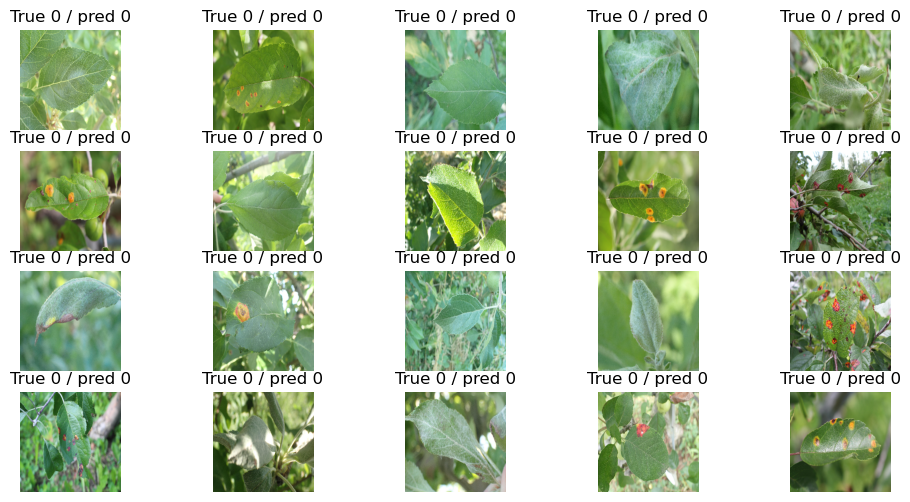

In [20]:
batch_image,batch_label = next(test_gen)
plt.figure(figsize=(12,6))


for i in range(min(20,len(batch_image))):
    plt.subplot(4,5,i+1)
    image = batch_image[i]
    plt.imshow(image)
    plt.title(f"True {y_true[i]} / pred {y_pred[i]}")
    plt.axis("off")


plt.show()

In [23]:
model.save("C:/Users/HP/Downloads/plant_deseas_model.h5")  # Save trained model


In [25]:
# pip install streamlit tensorflow keras numpy opencv-python pillow
